In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("govindaramsriram/energy-consumption-dataset-linear-regression")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\hp\.cache\kagglehub\datasets\govindaramsriram\energy-consumption-dataset-linear-regression\versions\1


In [8]:
import glob
import os
# جلب أول ملف .txt تلقائيًا
data_path = glob.glob(os.path.join(path, "*.csv"))[0]

df = pd.read_csv(data_path)
df


,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59
...,...,...,...,...,...,...,...
95,Commercial,1161,81,11,15.45,Weekend,3010.81
96,Residential,37943,50,23,21.73,Weekend,4248.49
97,Commercial,1558,27,29,16.86,Weekend,2843.60
98,Industrial,2145,56,12,11.77,Weekend,3348.39


# This problem that  we will predict the Energy Consumption 

## now  i will statrt EDA to prepare data

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        100 non-null    object 
 1   Square Footage       100 non-null    int64  
 2   Number of Occupants  100 non-null    int64  
 3   Appliances Used      100 non-null    int64  
 4   Average Temperature  100 non-null    float64
 5   Day of Week          100 non-null    object 
 6   Energy Consumption   100 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 5.6+ KB


In [15]:
df['Building Type'].unique()

array(['Residential', 'Commercial', 'Industrial'], dtype=object)

In [17]:
tobar=df['Building Type'].value_counts()

In [19]:
tobar.index

Index(['Residential', 'Industrial', 'Commercial'], dtype='object', name='Building Type')

<BarContainer object of 3 artists>

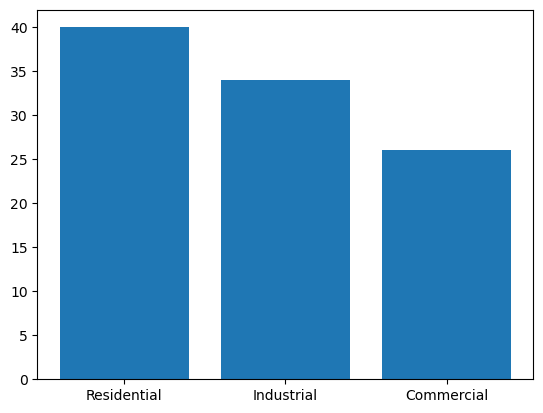

In [21]:
plt.bar(tobar.index,tobar.values)

In [22]:
# the statisics describe
print(f'The mean is : {df['Square Footage'].mean()}')
print(f'The mean is : {df['Square Footage'].median()}')

The mean is : 25881.92
The mean is : 27582.5


In [23]:
# then we have not outlier with data

### another way to know outlier using descripe()

In [28]:
df.describe()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,25881.920000,47.230000,26.970000,22.043300,4187.57830
std,13711.075264,29.905526,14.237846,6.957951,832.55985
min,1161.000000,2.000000,1.000000,10.400000,2351.97000
25%,14161.000000,21.000000,16.750000,15.682500,3621.92500
50%,27582.500000,47.000000,27.500000,21.970000,4249.39000
75%,38109.500000,73.000000,39.250000,27.492500,4797.17500
max,49354.000000,99.000000,49.000000,34.710000,6042.56000


(array([10.,  9.,  7.,  9., 10., 13., 10., 13., 11.,  8.]),
 array([ 1161. ,  5980.3, 10799.6, 15618.9, 20438.2, 25257.5, 30076.8,
        34896.1, 39715.4, 44534.7, 49354. ]),
 <BarContainer object of 10 artists>)

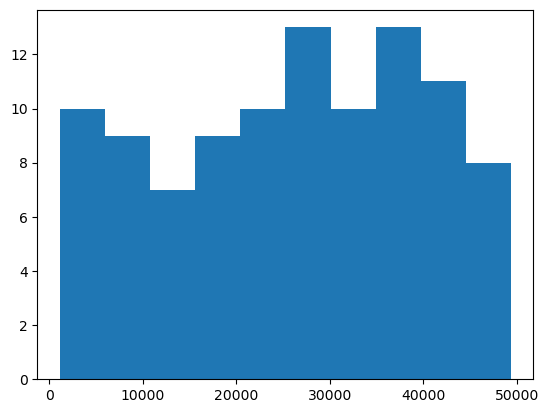

In [30]:
plt.hist(df['Square Footage'])

In [32]:
correlation=df.corr(numeric_only=True)['Energy Consumption'].sort_values(ascending=False)

In [34]:
correlation

Energy Consumption     1.000000
Square Footage         0.724039
Number of Occupants    0.308594
Appliances Used        0.176380
Average Temperature   -0.079733
Name: Energy Consumption, dtype: float64

## the most influence in Energy is Square Footage

In [37]:
dfsimple=df[['Square Footage','Energy Consumption']]

In [39]:
dfsimple

,Square Footage,Energy Consumption
0,24563,2865.57
1,27583,4283.80
2,45313,5067.83
3,41625,4624.30
4,36720,4820.59
...,...,...
95,1161,3010.81
96,37943,4248.49
97,1558,2843.60
98,2145,3348.39


In [63]:
x=dfsimple.iloc[:,:-1].values
y=dfsimple.iloc[:,-1].values

In [67]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=1)

In [83]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(x_test)

In [90]:
from sklearn.linear_model import LinearRegression
smodel=LinearRegression()

In [94]:
smodel.fit(x_train_scaled,y_train)

LinearRegression()

In [98]:
y_pred = smodel.predict(x_test_scaled)

In [124]:
def plot_results(x,y):
    plt.scatter(x, y, color = 'red')
    plt.plot(x,smodel.predict(x), color = 'blue')
    plt.title(f'Energy Consumption = {round(smodel.intercept_,2)} + {np.round(smodel.coef_[0],2)} Square Footage')
    plt.xlabel('Square Footage')
    plt.ylabel('Energy Consumption')
    plt.show()

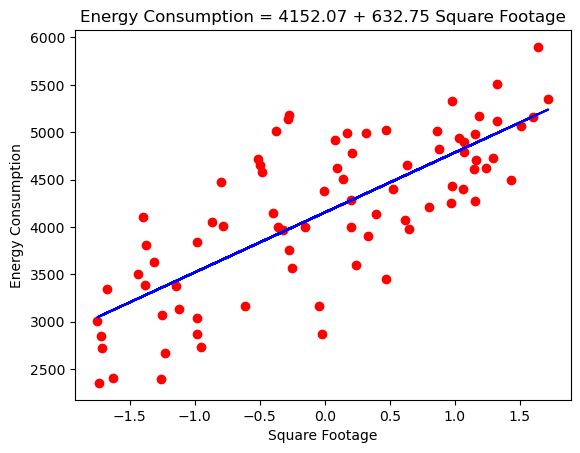

In [126]:
plot_results(x_train_scaled, y_train)

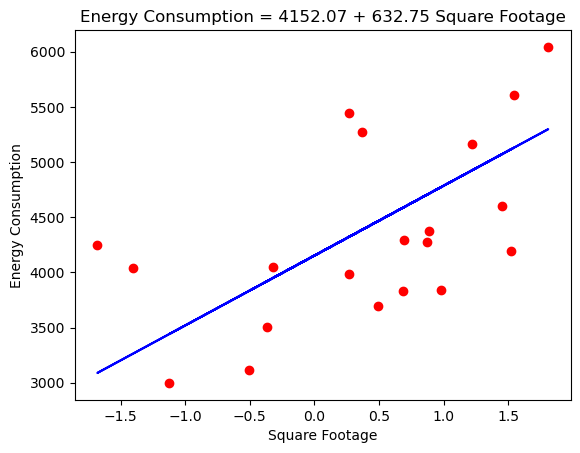

In [128]:
plot_results(x_test_scaled, y_test)